In [0]:
# Clone and get into the folder
!git clone https://github.com/ttaoREtw/Tacotron-pytorch.git

import os  
os.chdir('Tacotron-pytorch')

# Install some missing packages
!pip install unidecode
!pip install soundfile

Cloning into 'Tacotron-pytorch'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.
     |████████████████████████████████| 245kB 4.6MB/s 


In [0]:
import yaml
import torch
import numpy as np

from src.module import Tacotron
from src.symbols import txt2seq
from src.utils import AudioProcessor

%matplotlib inline
import matplotlib.pyplot as plt

import IPython
from IPython.display import Audio


config_path = 'config/config.yaml'
ckpt_path = 'ckpt/checkpoint_step138000.pth'

In [0]:
def load_ckpt(config, ckpt_path):
  ckpt = torch.load(ckpt_path, map_location=torch.device('cpu'))
  model = Tacotron(**config['model']['tacotron'])
  model.load_state_dict(ckpt['state_dict'])
  model.encoder.eval()
  model.postnet.eval()
  return model

def text2input(text):
  seq = np.asarray(txt2seq(text))
  seq = torch.from_numpy(seq).unsqueeze(0)
  return seq

def show_spec_figure(spec, audio_processor, sr):
  spec = audio_processor._denormalize(spec)
  off = 0.5
  plt.imshow(
    spec.T,
    aspect='auto',
    origin='lower',
    extent=(-off, spec.shape[0] - off, -off, sr/2 - off)
  )
  plt.xlabel('Frame')
  plt.ylabel('Frequency (Hz)')
  plt.colorbar()
  plt.title('Spectrogram')
  plt.tight_layout()
  plt.show()

def show_attn_figure(attn, r):
  off = 0.5
  plt.imshow(
    attn.T,
    aspect='auto',
    origin='lower',
    extent=(-off, attn.shape[0] * r - off, -off, attn.shape[1] - off)
  )
  plt.colorbar()
  plt.xlabel('Frame')
  plt.ylabel('Encoder timestep')
  plt.title('Attention')
  plt.tight_layout()
  plt.show()

def demo(model, text, config):
  ap = AudioProcessor(**config['audio'])
  model_input = text2input(text)
  with torch.no_grad():
    # Run the model
    mel, spec, attn = model(model_input)
  wav = ap.inv_spectrogram(spec[0].numpy().T)
  # Demo
  print(f"Text: {text}")
  IPython.display.display(Audio(wav, rate=config['audio']['sample_rate']))
  show_attn_figure(attn[0].numpy(), config['model']['tacotron']['r'])
  show_spec_figure(spec[0].numpy(), ap, config['audio']['sample_rate'])

In [0]:
config = yaml.load(open(config_path, 'r'))
model = load_ckpt(config, ckpt_path)

Text: Whatever you want me to say, I will say it.


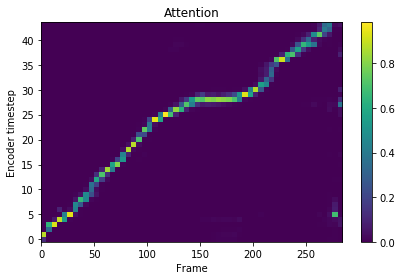

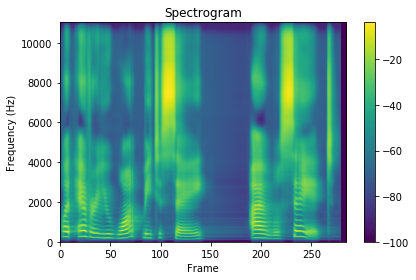

In [0]:
demo(model, 'Whatever you want me to say, I will say it.', config)